In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Load dataset
spam_data = pd.read_csv("spam.csv", encoding='latin-1')

In [10]:
spam_data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
spam_data.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [12]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
# Rename columns for clarity
spam_data = spam_data.rename(columns={"v1": "label", "v2": "message"})

In [13]:
spam_data.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


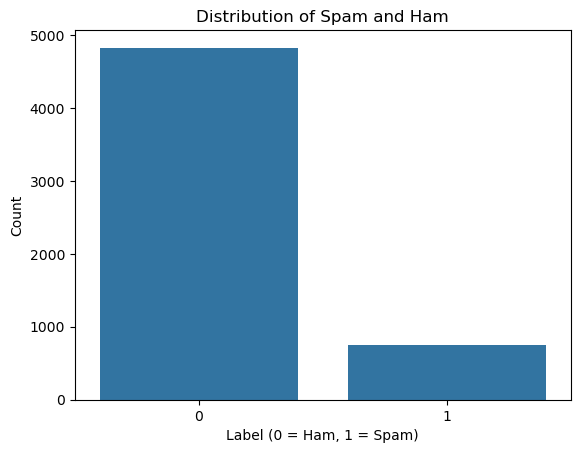

In [16]:
# 1. Distribution of Spam and Ham
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=spam_data, x='label')
plt.title("Distribution of Spam and Ham")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

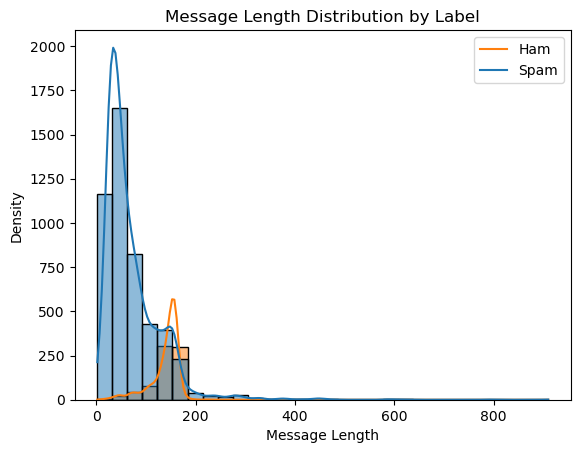

In [17]:
# 2. Message Length Distribution by Label
spam_data['message_length'] = spam_data['message'].apply(len)
sns.histplot(data=spam_data, x='message_length', hue='label', bins=30, kde=True)
plt.title("Message Length Distribution by Label")
plt.xlabel("Message Length")
plt.ylabel("Density")
plt.legend(["Ham", "Spam"])
plt.show()

In [7]:
# Drop unnecessary columns
spam_data = spam_data[["label", "message"]]

In [8]:
# Encode labels
spam_data['label'] = spam_data['label'].map({"ham": 0, "spam": 1})

In [24]:
X = spam_data['message']
y = spam_data['label']

In [30]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    spam_data['message'], spam_data['label'], test_size=0.3, random_state=42, stratify=spam_data['label']
)

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC()

In [35]:
model.fit(X_train_tfidf,y_train)

SVC()

In [36]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [37]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9802631578947368
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.86      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [38]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.86      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



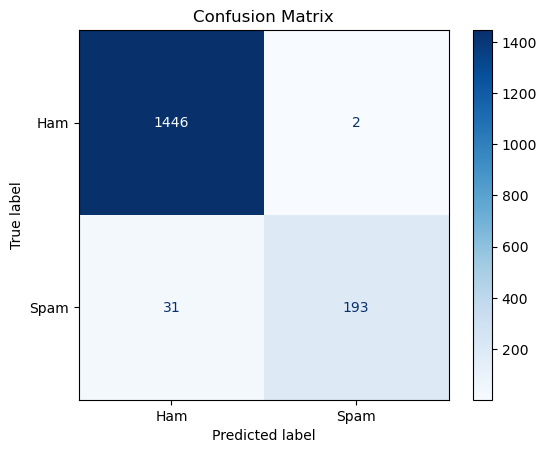

In [40]:
# 3. Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()